# Explore data

In [1]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
RAV = "RAVDESS/audio_speech_actors_01-24/"
TESS = "TESS/TESS Toronto emotional speech set data/"
SAVEE = "SAVEE/ALL/"
CREMA = "CREMA-D/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

# TESS dataset

In [3]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [4]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_sad         400
female_fear        400
female_disgust     400
female_surprise    400
female_happy       400
female_angry       400
female_neutral     400
Name: labels, dtype: int64

# SAVEE

In [5]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_happy        60
male_fear         60
male_disgust      60
male_angry        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

# RAVDESS dataset

In [6]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_disgust        96
male_angry          96
female_sad          96
male_sad            96
male_happy          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
male_fear           96
female_happy        96
male_surprise       96
Name: labels, dtype: int64

# CREMA-D dataset

In [7]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [8]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_happy        671
male_disgust      671
male_angry        671
male_fear         671
male_sad          671
female_fear       600
female_happy      600
female_angry      600
female_sad        600
female_disgust    600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

# Building model

In [9]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [10]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_happy       1096
female_disgust     1096
female_fear        1096
female_angry       1096
female_sad         1096
female_neutral     1056
male_neutral        839
male_fear           827
male_sad            827
male_happy          827
male_disgust        827
male_angry          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


In [11]:
ref = pd.read_csv("Data_path.csv")
ref.head()

,labels,source,path
0,male_angry,SAVEE,SAVEE/ALL/DC_a01.wav
1,male_angry,SAVEE,SAVEE/ALL/DC_a02.wav
2,male_angry,SAVEE,SAVEE/ALL/DC_a03.wav
3,male_angry,SAVEE,SAVEE/ALL/DC_a04.wav
4,male_angry,SAVEE,SAVEE/ALL/DC_a05.wav


In [12]:
df = pd.DataFrame(columns=['feature'])

counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

print(len(df))
df.head()

12162


,feature
0,"[-11.113933, -7.2157545, -6.2191906, -5.926543..."
1,"[-24.449831, -22.465742, -22.928043, -23.24380..."
2,"[-25.000114, -24.520256, -24.178183, -23.84745..."
3,"[-1.529839, -4.3334365, -12.285238, -13.083024..."
4,"[-22.458632, -22.467834, -25.884357, -27.82704..."


In [13]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,SAVEE/ALL/DC_a01.wav,-11.113933,-7.215755,-6.219191,-5.926543,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234094,-5.310308,-5.621666,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,SAVEE/ALL/DC_a02.wav,-24.449831,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530264,-25.457796
2,male_angry,SAVEE,SAVEE/ALL/DC_a03.wav,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,SAVEE/ALL/DC_a04.wav,-1.529839,-4.333436,-12.285238,-13.083024,-12.041327,-11.819768,-9.414148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male_angry,SAVEE,SAVEE/ALL/DC_a05.wav,-22.458632,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589962


In [14]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,SAVEE/ALL/DC_a01.wav,-11.113933,-7.215755,-6.219191,-5.926543,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234094,-5.310308,-5.621666,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,SAVEE/ALL/DC_a02.wav,-24.449831,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530264,-25.457796
2,male_angry,SAVEE,SAVEE/ALL/DC_a03.wav,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_angry,SAVEE,SAVEE/ALL/DC_a04.wav,-1.529839,-4.333436,-12.285238,-13.083024,-12.041327,-11.819768,-9.414148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_angry,SAVEE,SAVEE/ALL/DC_a05.wav,-22.458632,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589962


# Neural Network

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,-18.611181,-17.616535,-18.411484,-18.987421,-17.404621,-16.747272,-17.733749,-18.055027,-17.931210,-15.913172,...,-22.899403,-21.647814,-19.758650,-18.879402,-19.397377,-20.171659,-22.689240,-24.612816,-24.153774,-22.703133
3860,-10.786571,-14.882178,-23.087044,-22.467028,-20.362324,-19.076139,-19.761509,-13.231025,-11.808992,-16.756002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9761,-1.533947,-4.030603,-9.614022,-12.045175,-9.992991,-11.926252,-14.008465,-13.561556,-14.024567,-15.151947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7620,-4.531077,-3.933794,-4.567833,-5.871509,-5.282474,-6.490458,-8.156467,-9.188803,-8.681726,-8.212409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11586,-20.621702,-21.587505,-20.563650,-20.703461,-21.205719,-18.608530,-18.446669,-16.211843,-14.257651,-15.160404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7914,-17.514992,-18.551868,-17.043013,-16.977905,-19.369631,-19.562124,-22.008749,-20.178383,-17.989595,-19.336285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9513,-18.740364,-18.824934,-16.149492,-16.963453,-18.229979,-18.183958,-19.274342,-18.395124,-16.951286,-16.672031,...,-17.882132,-19.390713,-17.779476,-19.165974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5835,-19.066851,-18.328382,-17.710285,-18.043194,-18.252481,-18.710627,-16.626354,-17.831005,-18.028345,-17.859106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5389,-20.760590,-20.047142,-18.961348,-19.468687,-19.316292,-18.162565,-18.102335,-19.914131,-20.931385,-19.215494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11222,-18.252926,-17.727369,-19.222475,-18.469973,-17.572327,-17.850542,-17.932026,-20.588900,-18.612185,-15.990723,...,-18.065437,-18.135092,-19.665306,-20.741903,-20.273037,-18.371035,-15.576725,-17.512487,-17.008547,-18.195280


In [16]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [17]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [18]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [19]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(14))
model.add(Activation('softmax'))
opt = optimizers.RMSprop(learning_rate=0.00003, rho=0.9, epsilon=None, decay=0.0)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 128)           262272    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 128)            0

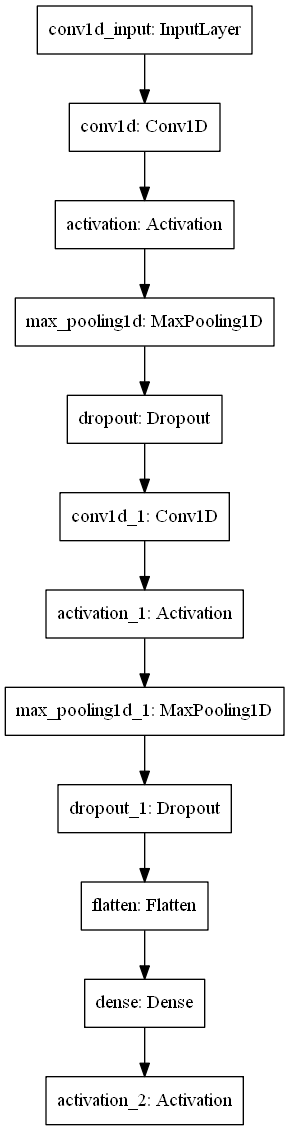

In [1]:
import keras
import tensorflow
from keras.utils.vis_utils import plot_model

restored_keras_model = keras.models.load_model("saved_models/Emotion_Model_211206.h5")

tensorflow.keras.utils.plot_model(restored_keras_model, to_file='model.png')

In [33]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
286/286 [==============================] - 12s 40ms/step - loss: 2.5444 - accuracy: 0.1236 - val_loss: 2.4693 - val_accuracy: 0.1532
Epoch 2/500
286/286 [==============================] - 12s 42ms/step - loss: 2.4396 - accuracy: 0.1578 - val_loss: 2.3898 - val_accuracy: 0.1730
Epoch 3/500
286/286 [==============================] - 12s 41ms/step - loss: 2.3819 - accuracy: 0.1716 - val_loss: 2.3401 - val_accuracy: 0.1795
Epoch 4/500
286/286 [==============================] - 12s 42ms/step - loss: 2.3492 - accuracy: 0.1852 - val_loss: 2.3049 - val_accuracy: 0.2003
Epoch 5/500
286/286 [==============================] - 12s 42ms/step - loss: 2.3210 - accuracy: 0.1972 - val_loss: 2.2795 - val_accuracy: 0.2022
Epoch 6/500
286/286 [==============================] - 12s 41ms/step - loss: 2.3001 - accuracy: 0.1973 - val_loss: 2.2579 - val_accuracy: 0.2266
Epoch 7/500
286/286 [==============================] - 12s 41ms/step - loss: 2.2889 - accuracy: 0.2091 - val_loss: 2.2420 - val_ac

286/286 [==============================] - 12s 43ms/step - loss: 1.7775 - accuracy: 0.3848 - val_loss: 1.7671 - val_accuracy: 0.3897
Epoch 114/500
286/286 [==============================] - 13s 44ms/step - loss: 1.7768 - accuracy: 0.3767 - val_loss: 1.7662 - val_accuracy: 0.3956
Epoch 115/500
286/286 [==============================] - 12s 42ms/step - loss: 1.7715 - accuracy: 0.3848 - val_loss: 1.7645 - val_accuracy: 0.3926
Epoch 116/500
286/286 [==============================] - 12s 42ms/step - loss: 1.7705 - accuracy: 0.3815 - val_loss: 1.7639 - val_accuracy: 0.3979
Epoch 117/500
286/286 [==============================] - 13s 45ms/step - loss: 1.7692 - accuracy: 0.3860 - val_loss: 1.7622 - val_accuracy: 0.3982
Epoch 118/500
286/286 [==============================] - 12s 43ms/step - loss: 1.7667 - accuracy: 0.3903 - val_loss: 1.7605 - val_accuracy: 0.3976
Epoch 119/500
286/286 [==============================] - 12s 43ms/step - loss: 1.7641 - accuracy: 0.3912 - val_loss: 1.7578 - val_ac

Epoch 169/500
286/286 [==============================] - 12s 43ms/step - loss: 1.7032 - accuracy: 0.4084 - val_loss: 1.7131 - val_accuracy: 0.4055
Epoch 170/500
286/286 [==============================] - 13s 45ms/step - loss: 1.6911 - accuracy: 0.4120 - val_loss: 1.7095 - val_accuracy: 0.4130
Epoch 171/500
286/286 [==============================] - 15s 53ms/step - loss: 1.6964 - accuracy: 0.4094 - val_loss: 1.7084 - val_accuracy: 0.4101
Epoch 172/500
286/286 [==============================] - 15s 54ms/step - loss: 1.6974 - accuracy: 0.4156 - val_loss: 1.7117 - val_accuracy: 0.4071
Epoch 173/500
286/286 [==============================] - 16s 57ms/step - loss: 1.6922 - accuracy: 0.4102 - val_loss: 1.7088 - val_accuracy: 0.4101
Epoch 174/500
286/286 [==============================] - 13s 46ms/step - loss: 1.6874 - accuracy: 0.4166 - val_loss: 1.7067 - val_accuracy: 0.4157
Epoch 175/500
286/286 [==============================] - 12s 44ms/step - loss: 1.6881 - accuracy: 0.4137 - val_loss: 1

Epoch 280/500
286/286 [==============================] - 12s 44ms/step - loss: 1.6039 - accuracy: 0.4466 - val_loss: 1.6586 - val_accuracy: 0.4239
Epoch 281/500
286/286 [==============================] - 12s 44ms/step - loss: 1.6053 - accuracy: 0.4446 - val_loss: 1.6604 - val_accuracy: 0.4258
Epoch 282/500
286/286 [==============================] - 13s 44ms/step - loss: 1.5986 - accuracy: 0.4422 - val_loss: 1.6595 - val_accuracy: 0.4252
Epoch 283/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5992 - accuracy: 0.4427 - val_loss: 1.6620 - val_accuracy: 0.4235
Epoch 284/500
286/286 [==============================] - 12s 43ms/step - loss: 1.6023 - accuracy: 0.4475 - val_loss: 1.6574 - val_accuracy: 0.4258
Epoch 285/500
286/286 [==============================] - 13s 44ms/step - loss: 1.5925 - accuracy: 0.4446 - val_loss: 1.6552 - val_accuracy: 0.4258
Epoch 286/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5926 - accuracy: 0.4430 - val_loss: 1

Epoch 336/500
286/286 [==============================] - 12s 40ms/step - loss: 1.5645 - accuracy: 0.4611 - val_loss: 1.6454 - val_accuracy: 0.4272
Epoch 337/500
286/286 [==============================] - 12s 40ms/step - loss: 1.5590 - accuracy: 0.4654 - val_loss: 1.6454 - val_accuracy: 0.4298
Epoch 338/500
286/286 [==============================] - 12s 41ms/step - loss: 1.5652 - accuracy: 0.4542 - val_loss: 1.6417 - val_accuracy: 0.4298
Epoch 339/500
286/286 [==============================] - 12s 41ms/step - loss: 1.5584 - accuracy: 0.4577 - val_loss: 1.6439 - val_accuracy: 0.4318
Epoch 340/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5598 - accuracy: 0.4585 - val_loss: 1.6464 - val_accuracy: 0.4305
Epoch 341/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5697 - accuracy: 0.4536 - val_loss: 1.6467 - val_accuracy: 0.4255
Epoch 342/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5637 - accuracy: 0.4553 - val_loss: 1

Epoch 392/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5380 - accuracy: 0.4618 - val_loss: 1.6337 - val_accuracy: 0.4334
Epoch 393/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5302 - accuracy: 0.4714 - val_loss: 1.6360 - val_accuracy: 0.4291
Epoch 394/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5345 - accuracy: 0.4618 - val_loss: 1.6337 - val_accuracy: 0.4298
Epoch 395/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5311 - accuracy: 0.4644 - val_loss: 1.6367 - val_accuracy: 0.4268
Epoch 396/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5372 - accuracy: 0.4631 - val_loss: 1.6330 - val_accuracy: 0.4288
Epoch 397/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5321 - accuracy: 0.4648 - val_loss: 1.6327 - val_accuracy: 0.4242
Epoch 398/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5351 - accuracy: 0.4630 - val_loss: 1

Epoch 448/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5044 - accuracy: 0.4780 - val_loss: 1.6285 - val_accuracy: 0.4324
Epoch 449/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5154 - accuracy: 0.4782 - val_loss: 1.6253 - val_accuracy: 0.4347
Epoch 450/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5158 - accuracy: 0.4747 - val_loss: 1.6266 - val_accuracy: 0.4344
Epoch 451/500
286/286 [==============================] - 12s 43ms/step - loss: 1.5048 - accuracy: 0.4767 - val_loss: 1.6290 - val_accuracy: 0.4344
Epoch 452/500
286/286 [==============================] - 12s 43ms/step - loss: 1.4947 - accuracy: 0.4775 - val_loss: 1.6258 - val_accuracy: 0.4347
Epoch 453/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5102 - accuracy: 0.4713 - val_loss: 1.6278 - val_accuracy: 0.4324
Epoch 454/500
286/286 [==============================] - 12s 42ms/step - loss: 1.5027 - accuracy: 0.4732 - val_loss: 1

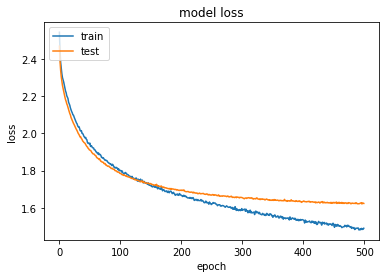

In [34]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

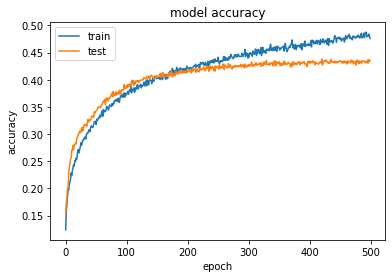

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Save model and weights
model_name = 'Emotion_Model_211206.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\김규리\Desktop\대학원\21-2\딥러닝기반빅데이터분석\프로젝트\saved_models\Emotion_Model_211206.h5 


In [37]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_211206.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = optimizers.RMSprop(lr=0.00003, decay=0)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 43.44%


In [38]:
preds = loaded_model.predict(X_test, 
                         batch_size=32, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

96/96 [==============================] - 1s 11ms/step


array([ 3,  3,  8, ..., 13, 12,  0], dtype=int64)

In [39]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:160]

,actualvalues,predictedvalues
150,female_angry,female_angry
151,male_neutral,male_neutral
152,female_neutral,female_neutral
153,male_neutral,male_neutral
154,male_angry,female_angry
155,female_surprise,female_disgust
156,male_neutral,male_neutral
157,male_disgust,male_neutral
158,male_disgust,male_surprise
159,female_fear,female_fear


In [40]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,288
female_disgust,303
female_fear,231
female_happy,294
female_neutral,291
female_sad,360
female_surprise,162
male_angry,249
male_disgust,109


In [41]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4343965800723446


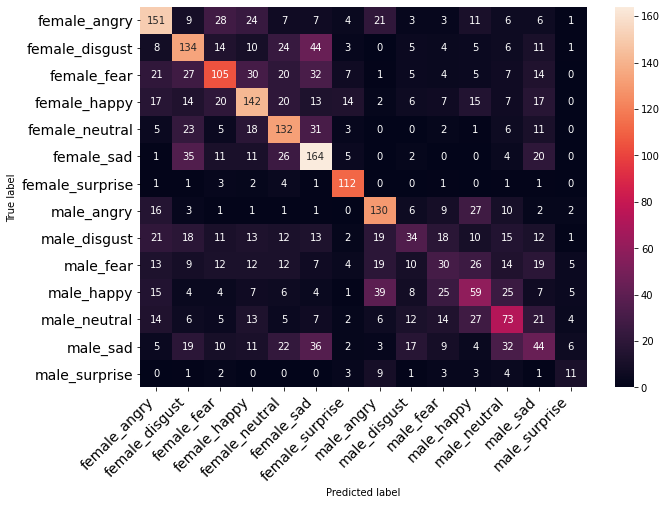

In [42]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [43]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.52      0.54      0.53       281
 female_disgust       0.44      0.50      0.47       269
    female_fear       0.45      0.38      0.41       278
   female_happy       0.48      0.48      0.48       294
 female_neutral       0.45      0.56      0.50       237
     female_sad       0.46      0.59      0.51       279
female_surprise       0.69      0.88      0.78       127
     male_angry       0.52      0.62      0.57       209
   male_disgust       0.31      0.17      0.22       199
      male_fear       0.23      0.16      0.19       192
     male_happy       0.31      0.28      0.29       209
   male_neutral       0.35      0.35      0.35       209
       male_sad       0.24      0.20      0.22       220
  male_surprise       0.31      0.29      0.30        38

       accuracy                           0.43      3041
      macro avg       0.41      0.43      0.42      3041
   weighted avg       0.42   

0.8000657678395264


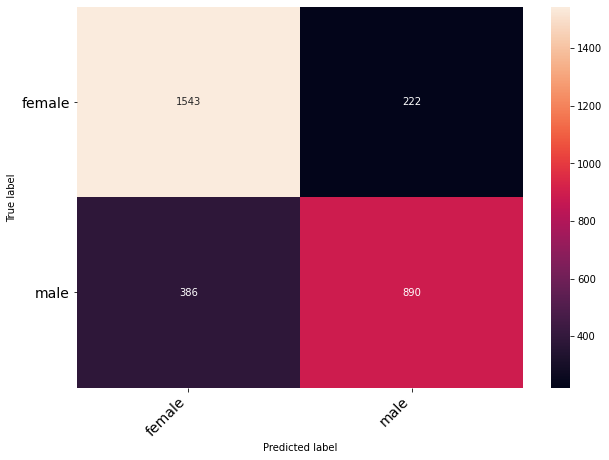

In [44]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [45]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.80      0.87      0.84      1765
        male       0.80      0.70      0.75      1276

    accuracy                           0.80      3041
   macro avg       0.80      0.79      0.79      3041
weighted avg       0.80      0.80      0.80      3041



0.48964156527458075


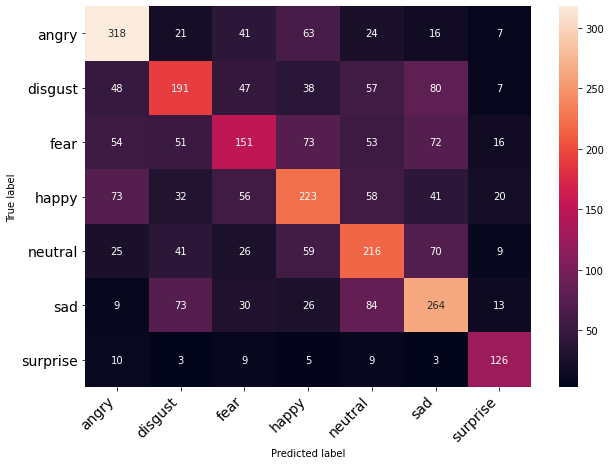

In [46]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [47]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.59      0.65      0.62       490
     disgust       0.46      0.41      0.43       468
        fear       0.42      0.32      0.36       470
       happy       0.46      0.44      0.45       503
     neutral       0.43      0.48      0.46       446
         sad       0.48      0.53      0.51       499
    surprise       0.64      0.76      0.69       165

    accuracy                           0.49      3041
   macro avg       0.50      0.51      0.50      3041
weighted avg       0.48      0.49      0.48      3041



## Test with a new audio data

In [96]:
audio_file_name='TEST/GOMCAM 20211206_2159310210_extract_0.wav' #길이가 3초 이상이어야 됨
data, sampling_rate = librosa.load(audio_file_name)
ipd.Audio(audio_file_name)

In [92]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_211206.h5")
print("Loaded model from disk")

# the optimiser
opt = optimizers.RMSprop(learning_rate=0.00003, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [97]:
X, sample_rate = librosa.load(audio_file_name
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,-43.44466,...,-12.663748,-11.826295,-10.535853,-9.414025,-10.318277,-12.250612,-11.905141,-10.516318,-8.999448,-6.037409


In [98]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=32, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 22ms/step


array([[1.7976205e-30, 2.0562652e-20, 0.0000000e+00, 0.0000000e+00,
        6.2938322e-28, 4.6109207e-14, 1.0000000e+00, 0.0000000e+00,
        2.3900693e-23, 0.0000000e+00, 0.0000000e+00, 2.2406356e-36,
        8.8646565e-29, 0.0000000e+00]], dtype=float32)

In [99]:
filename = 'labels'
outfile = open(filename,'rb')
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()


# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['female_surprise']
